In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,KFold, cross_val_score, RepeatedKFold,GridSearchCV

### Load data

Estos datos corresponden a simulaciones matemáticas de un proceso de fabricación de fertilizantes

In [2]:
data = pd.read_excel('fertilizers.xlsx')
features = ['FrSolMF','WatMF','FuMF','AiMF','MillFr','GrVel','CoVel','FrSolPSD','PBlow']
target = 'ExCo'
all_variables = features[:]
all_variables.append(target)
data[all_variables].shape
X = data[features]
y = data[target]

Entrena un RandomForestRegressor (si quieres usar otro no hay problema) y extraer el error de entranamiento (resubstitution error).
Usa R2, MAE y RMSE para mostrar el error
Muestra el error gráficamente con un gráfico de tu conveniencia (se recomienda usar regplot de seaborn).

R^2 es: 0.9968503361221283
MAE es 0.13387087818382923
RMSE es 0.03010751477107904


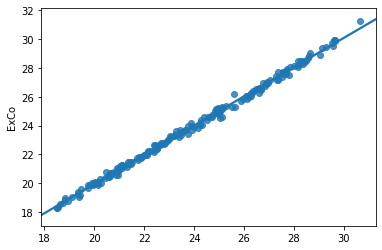

In [3]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X,y)
predictions = rf.predict(X)

def metricas (pred_y, true_y):
    print('R^2 es:', r2_score(true_y,pred_y))
    print('MAE es', mean_absolute_error(true_y,pred_y))
    print ('RMSE es', mean_squared_error(true_y,pred_y))

metricas(predictions, y)
ax = sns.regplot(predictions, y)

Implementa el método hold-out (70%-30%) y muestra los resultados como en el ejercicio anterior

R^2 es: 0.96840706146351
MAE es 0.4217464788463928
RMSE es 0.3237392706253258


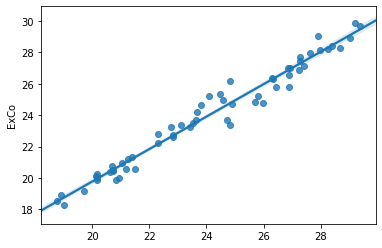

In [4]:
#Separar datos de train y test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

metricas(predictions, y_test)
ax = sns.regplot(predictions, y_test)

Implementa Kfold CV y extrae el R2 por cada fold, la media y la varianza de todos

In [5]:
kfold = KFold(n_splits = 5, shuffle=True) # shuffle= true realizar los folds con datos aleatorios
kfold_r2_scores_rf = cross_val_score(rf, X, y, cv=kfold,n_jobs=-1)
#cross_val_score(modelo, datos, objetivo, numero de segmentos, ejecunciones)
print(kfold_r2_scores_rf)
print("Mean 5-kfold R Squared: {} and variance: {}".format(np.mean(kfold_r2_scores_rf),np.var(kfold_r2_scores_rf)))

[0.97032303 0.96877046 0.98094202 0.96971855 0.96864112]
Mean 5-kfold R Squared: 0.9716790347903039 and variance: 2.183479968451937e-05


Haz lo mismo con RepeatedKFold

In [6]:
rep_kfold = RepeatedKFold(n_splits = 10, n_repeats = 10)
rep_kfold_r2_scores_rf = cross_val_score(rf, X, y, cv=rep_kfold,n_jobs=-1)
print(rep_kfold_r2_scores_rf)
print("Mean 10-shuffle R Squared: {} and standard dev: {}".format(np.mean(rep_kfold_r2_scores_rf),np.var(rep_kfold_r2_scores_rf)))


[0.98021781 0.97784393 0.96394868 0.9704926  0.9826912  0.99187062
 0.96448888 0.95433589 0.9706823  0.97723756 0.97883803 0.98627986
 0.97857596 0.99130065 0.97902078 0.97930965 0.96165202 0.90672609
 0.95961737 0.98301974 0.97771724 0.97793894 0.96415457 0.96993172
 0.96173455 0.98253233 0.98737262 0.95975232 0.97881887 0.98500287
 0.97370835 0.97654184 0.98077313 0.98884922 0.964891   0.96763443
 0.96819345 0.98778964 0.96713499 0.97813566 0.96546152 0.9833738
 0.97828966 0.97905247 0.98717689 0.97020275 0.96641765 0.97394962
 0.96052627 0.98750807 0.98086416 0.97709432 0.96640049 0.98978424
 0.97983454 0.98060567 0.96936161 0.96596657 0.97849265 0.96441279
 0.96565971 0.96460453 0.97314277 0.96527644 0.9900359  0.97836589
 0.97120631 0.983876   0.97334851 0.97034344 0.96669857 0.96624132
 0.97723849 0.99063124 0.96837123 0.96855351 0.94655024 0.98215191
 0.97951845 0.96900427 0.97804779 0.9822938  0.98084816 0.96519286
 0.9636618  0.97700394 0.97990516 0.97313286 0.97584209 0.95324

Estima la mejor parametrización para el número de estimadores del RandomForest con la función GridSearch.

In [7]:
param_grid = {"n_estimators": [10, 50, 100, 200, 500, 1000]}

rf = RandomForestRegressor()

## Perform the grid search over the parameters
clf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                      cv = kfold, # Use the inside folds
                      return_train_score = True,n_jobs=-1)

## Fit thhe cross validated grid search over the data 
clf.fit(X, y)
keys = list(clf.cv_results_.keys())
for key in keys[6:16]:
    print(clf.cv_results_[key])
## And print the best parameter value
clf.best_estimator_.n_estimators

[0.96210921 0.9736766  0.97727195 0.97583763 0.9776634  0.97856212]
[0.96435271 0.96771642 0.97168316 0.97043047 0.97048186 0.97112532]
[0.95804155 0.96532944 0.96403553 0.96735486 0.96415216 0.96598534]
[0.95520073 0.96516108 0.9704782  0.97009014 0.97127034 0.97007404]
[0.96051725 0.96933869 0.96947851 0.97167171 0.97348357 0.97265914]
[0.96004429 0.96824445 0.97058947 0.97107696 0.97141027 0.97168119]
[0.00317872 0.00313014 0.00424388 0.00276635 0.00440368 0.00408994]
[6 5 4 3 2 1]
[0.99273734 0.99594895 0.99574151 0.99600569 0.99646042 0.99641973]
[0.99279513 0.99519711 0.99621677 0.99610207 0.9962383  0.99643029]


1000

Con el mejor parámetro que has obtenido vuelve a ejecutar el ejecutar RepeatedKfold, notas algún cambio?

In [8]:
rf = RandomForestRegressor(n_estimators = clf.best_estimator_.n_estimators)

rep_kfold = RepeatedKFold(n_splits = 10, n_repeats = 10)
rep_kfold_r2_scores_rf = cross_val_score(rf, X, y, cv=rep_kfold,n_jobs=-1)
print(rep_kfold_r2_scores_rf)
print("Mean 10-shuffle R Squared: {} and standard dev: {}".format(np.mean(rep_kfold_r2_scores_rf),np.var(rep_kfold_r2_scores_rf)))


[0.95291723 0.96687917 0.98970424 0.98213473 0.97857139 0.9755895
 0.97267087 0.9852875  0.99303172 0.96738915 0.97365684 0.97626263
 0.97721514 0.97199701 0.97443716 0.97305675 0.99067435 0.97138795
 0.97150501 0.98077658 0.97846961 0.94492701 0.96393985 0.97783058
 0.98467375 0.98553348 0.95867005 0.97999518 0.98684698 0.94553445
 0.97838988 0.96748392 0.95598735 0.97679464 0.95915333 0.9811024
 0.98851256 0.97433116 0.94872718 0.97867129 0.97364357 0.96616861
 0.97202516 0.98324326 0.98208939 0.97864342 0.9660632  0.97791921
 0.97106201 0.97695426 0.98196279 0.97824109 0.97162477 0.98102176
 0.98761014 0.97585762 0.96366302 0.96042721 0.98275289 0.98192778
 0.96740601 0.98018969 0.9787621  0.98496013 0.96929049 0.9602539
 0.99087932 0.97725904 0.97044757 0.96982898 0.97055245 0.97714511
 0.96631492 0.98656734 0.97325248 0.97191632 0.97639137 0.97529832
 0.98396321 0.97885409 0.97986944 0.97465797 0.9769505  0.97321231
 0.97542241 0.97706981 0.96501348 0.97665945 0.97523008 0.9789559